## Model Neural Network dengan MNIST Dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# print(tf.__version__)

In [ ]:
df = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = df.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Check Data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

### Data Preprocess

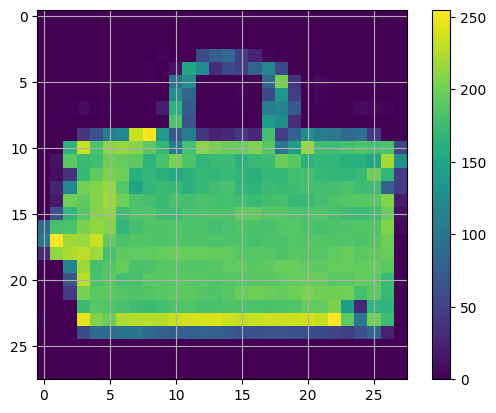

In [ ]:
plt.figure()
plt.imshow(train_images[99])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

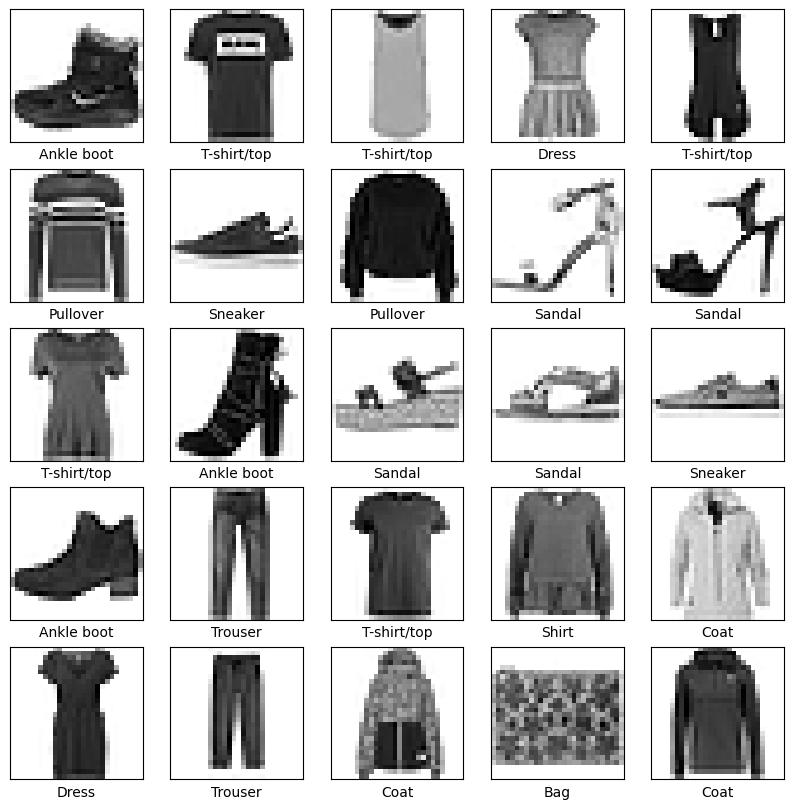

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

### Membuat Model Neural Network

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5000 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3413 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3162 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2980 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2482 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

### Evaluation

In [ ]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy: ', test_acc)
print('\nTest Loss: ', test_loss)

313/313 - 0s - loss: 0.3458 - accuracy: 0.8832 - 427ms/epoch - 1ms/step

Test Accuracy:  0.8831999897956848

Test Loss:  0.3458472788333893


### Prediction

In [ ]:
prob_model = tf.keras.Sequential([model,
                                  tf.keras.layers.Softmax()])

In [ ]:
prediction = prob_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [ ]:
prediction[10]

array([3.2428998e-05, 2.9595444e-07, 3.0458897e-02, 6.0212742e-12,
       9.6601790e-01, 5.9039357e-11, 3.4903167e-03, 3.8925491e-14,
       4.3778851e-08, 1.2971127e-08], dtype=float32)

In [ ]:
np.argmax(prediction[10])

4

In [ ]:
test_labels[10]

4

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

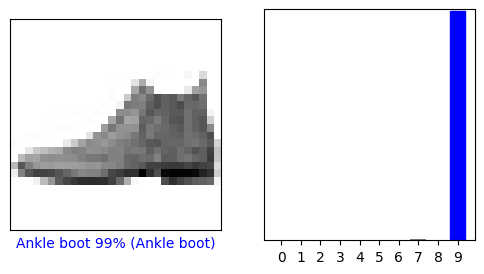

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

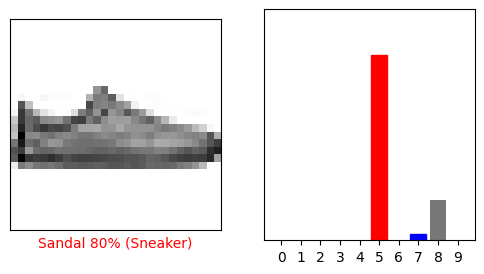

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

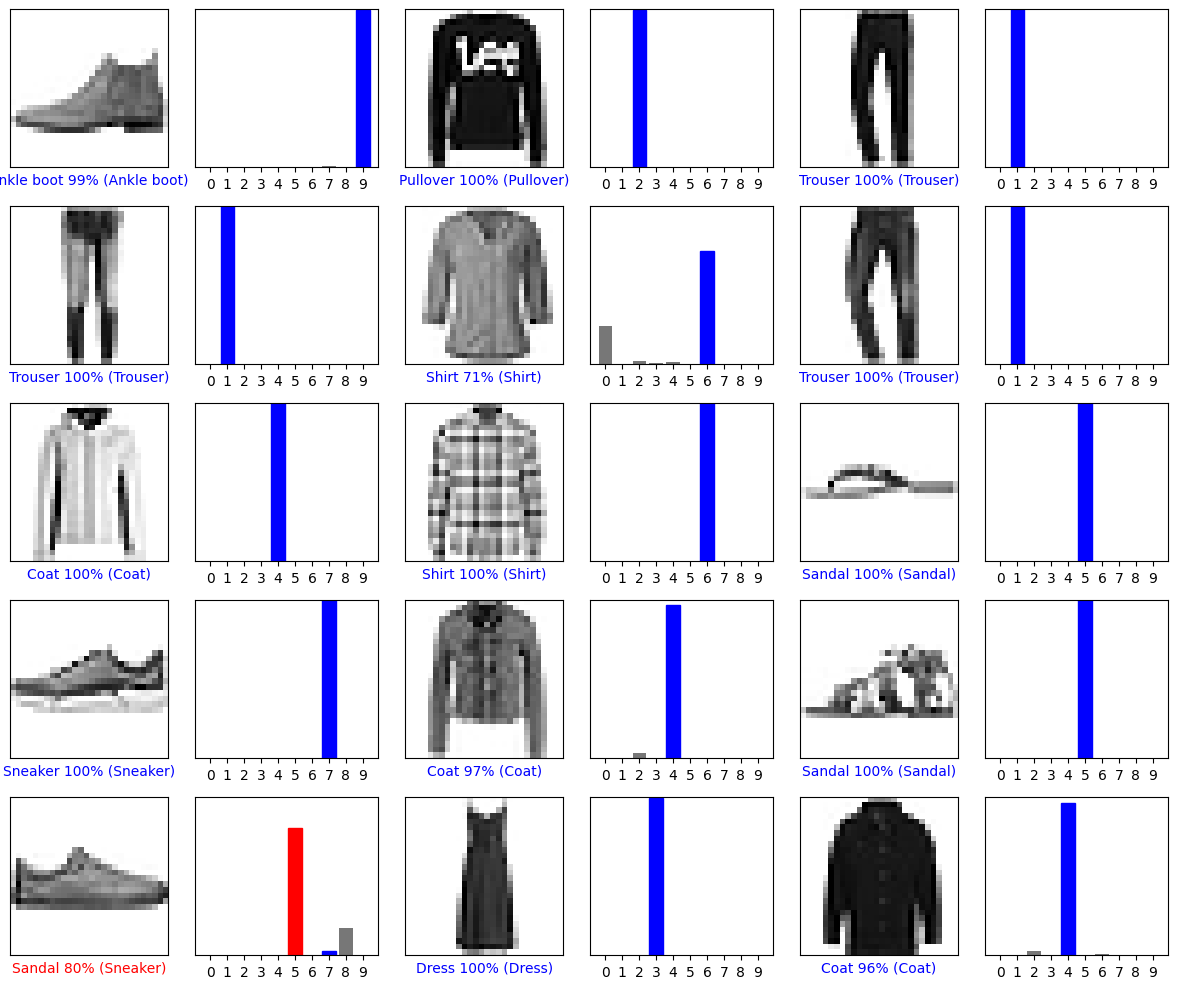

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

### Menggunakan trained model

In [ ]:
img = test_images[1]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = prob_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[4.9598439e-04 2.8467300e-13 9.9615908e-01 1.0969342e-10 5.3170172e-04
  1.3130916e-17 2.8132785e-03 2.9374176e-22 4.3845177e-11 6.9066546e-13]]


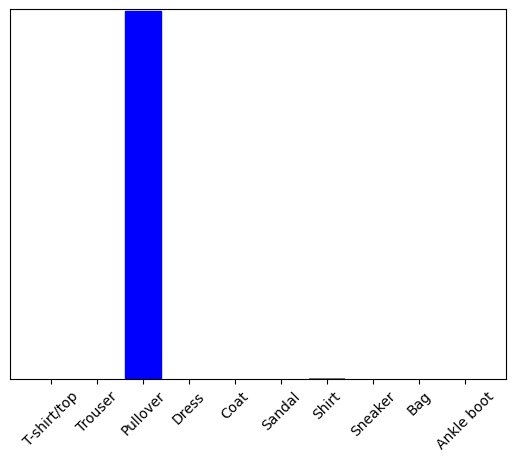

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2